#### Iphone Purchases are getting increased day by day and many stores wants to predict whether a customer will purchase an Iphone from thier store given their gender, age and salary.
#### Build a KNN Classifier model by performing EDA and do necessary transformations and select the best model using Python.ta
##### Prediction  - Whether Customer will purchase or no
Dataset Name - bangalore house price prediction OHE-datat


In [1]:
## Importing all the necessary libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
## Load the Dataset
data = pd.read_csv("D:/TopMentor_DS_course/KNN_Project_56/iphone_purchase_records.csv")


In [3]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
print("Columns in the Datasets: ", data.columns)

Columns in the Datasets:  Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')


In [5]:
print("Shape of the Dataset: ", data.shape)
print()
print("Information of Dataset")
print("====================================================")
data.info()

Shape of the Dataset:  (400, 4)

Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
print("Null Values in the Datsets: ", data.isnull().sum())

Null Values in the Datsets:  Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64


In [7]:
## Descriptive Analysis 

round(data.describe(),2)

,Age,Salary,Purchase Iphone
count,400.00,400.00,400.00
mean,37.66,69742.50,0.36
std,10.48,34096.96,0.48
min,18.00,15000.00,0.00
25%,29.75,43000.00,0.00
50%,37.00,70000.00,0.00
75%,46.00,88000.00,1.00
max,60.00,150000.00,1.00


##### 🔍 Insight

No missing values present

Target column: Purchased (0 = No, 1 = Yes)

Age and Salary are numerical → good for KNN

#### EXPLORATORY DATA ANALYSIS (EDA)

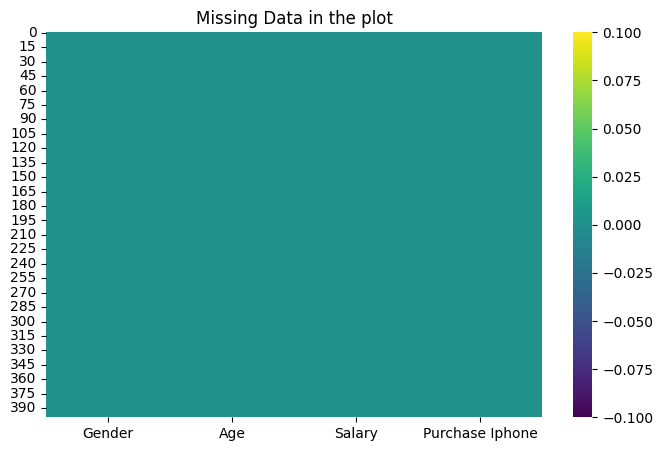

In [8]:
# Missing data in a plot

plt.figure(figsize=(8,5))
plt.title("Missing Data in the plot")
sns.heatmap(data.isnull(), cmap='viridis')
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Iphone_Purchase_Graphs/Heatmap.png")

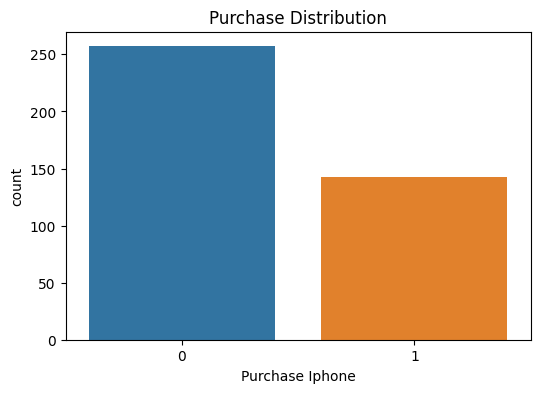

In [9]:
###  Distribution of Target Variable
plt.figure(figsize=(6,4))
sns.countplot(x='Purchase Iphone', data=data)
plt.title("Purchase Distribution")
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Iphone_Purchase_Graphs/Iphone Purchase Distr.png")
plt.show()

🧠 Interpretation

More customers did not purchase compared to those who did

Slight class imbalance (acceptable for KNN)

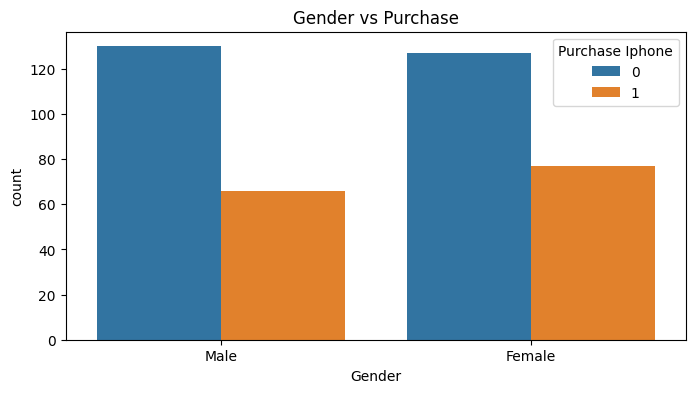

In [10]:
### Gender vs Purchase
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', hue='Purchase Iphone', data=data)
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Iphone_Purchase_Graphs/Gender vs Purchase.png")
plt.title("Gender vs Purchase")
plt.show()

Both males and females purchase iPhones

Gender alone is not a strong deciding factor

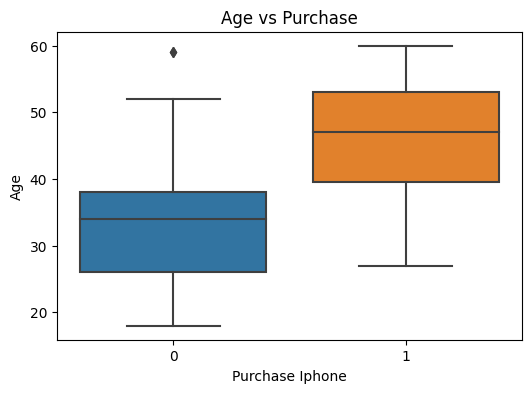

In [11]:
###  Age vs Purchase
plt.figure(figsize=(6,4))
sns.boxplot(x='Purchase Iphone', y='Age', data=data)
plt.title("Age vs Purchase")
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Iphone_Purchase_Graphs/Age vs Purchase.png")
plt.show()

Interpretation

Customers who purchase iPhones tend to be older

Age is an important feature

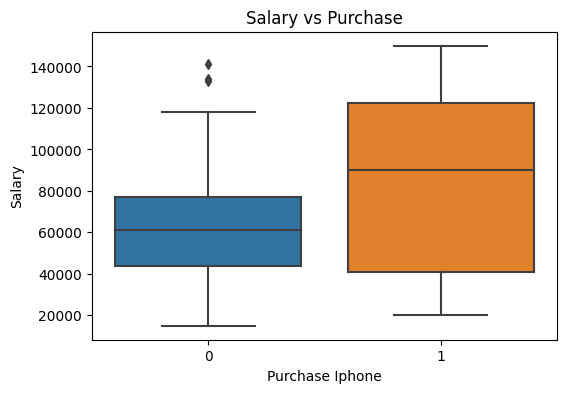

In [12]:
### Salary vs Purchase
plt.figure(figsize=(6,4))
sns.boxplot(x='Purchase Iphone', y='Salary', data=data)
plt.title("Salary vs Purchase")
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Iphone_Purchase_Graphs/Salary vs Purchase.png")
plt.show()

Interpretation

Higher salary customers are more likely to purchase

Salary strongly influences buying decision

In [13]:
## Encoding Genderr Column 

data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

print("Gender encoded successfully!")
data.head()

Gender encoded successfully!


,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [14]:
## Features and Target Selection 

X = data[['Gender', 'Age', 'Salary']]
y = data['Purchase Iphone']

print("Features and target selected!")

Features and target selected!


In [15]:
## Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (300, 3)
Testing set size: (100, 3)


In [16]:
## Applying feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling completed!")

Feature scaling completed!


In [17]:
##  Selecting the no of neighbors based on the error

error=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    error.append(err)


In [18]:
print(error)

[0.13, 0.18000000000000005, 0.07999999999999996, 0.07999999999999996, 0.07999999999999996, 0.07999999999999996, 0.06999999999999995, 0.06000000000000005, 0.06000000000000005]


In [19]:
## Building KNN model with K = 9

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print("KNN model trained successfully!")

KNN model trained successfully!


In [20]:
## Making predictions on test data

y_pred = knn.predict(X_test)
print(y_pred)
print("Predictions completed!")

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1]
Predictions completed!


In [21]:
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 94.0 %


[[59  4]
 [ 2 35]]


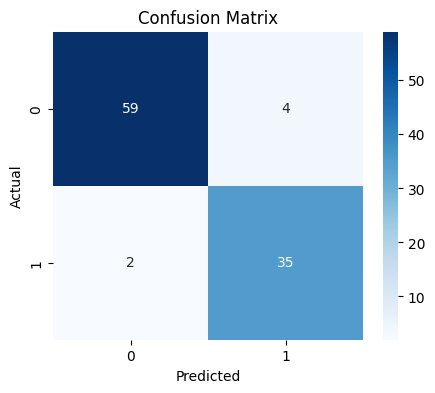

In [22]:
## Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
err = 1 - accuracy_score(y_test, y_pred)
err

0.06000000000000005

##### 📌 Key Insights

Age and Salary are the strongest predictors of iPhone purchase

Gender has minimal impact on purchasing decision

KNN performs well after feature scaling

Customers with higher income & middle age are more likely to buy

#### Conclusion

The KNN Classifier successfully predicts whether a customer will purchase an iPhone

This model can help businesses:

Target the right customers

Optimize marketing campaigns

Increase conversion rates